In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import inspect
import sys
import string


In [36]:
processed_tweets = pd.read_csv('../data/processed_tweet_data.csv')
processed_tweets.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,0.0,de,355,355.0,McMc74078966,3,12,NaN,[],"[{'screen_name': 'nikitheblogger', 'name': 'Ne...",NaN
1,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,0.0,de,505,505.0,McMc74078966,3,12,NaN,[],"[{'screen_name': 'sagt_mit', 'name': 'Sie sagt...",NaN
2,Fri Apr 22 22:17:28 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,0.0,de,4,4.0,McMc74078966,3,12,NaN,[],"[{'screen_name': 'Kryptonoun', 'name': 'Krypto...",NaN
3,Fri Apr 22 22:17:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,0.0,de,332,332.0,McMc74078966,3,12,NaN,"['Deutschen', 'Spritpreisen', 'inflation', 'Ab...","[{'screen_name': 'WRi007', 'name': 'Wolfgang B...",NaN
4,Fri Apr 22 22:13:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @RolandTichy: Baerbock verkündet mal so neb...,0.0,0.0,de,386,386.0,McMc74078966,3,12,NaN,[],"[{'screen_name': 'RolandTichy', 'name': 'Rolan...",NaN


### Data Exploration
* Look at the columns in the data
* Look at the type of data in the columns
* Check if there are any missing values


In [37]:
processed_tweets.columns

Index(['created_at', 'source', 'original_text', 'polarity', 'subjectivity',
       'lang', 'favorite_count', 'retweet_count', 'original_author',
       'followers_count', 'friends_count', 'possibly_sensitive', 'hashtags',
       'user_mentions', 'place'],
      dtype='object')

In [38]:
processed_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24637 entries, 0 to 24636
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          24637 non-null  object 
 1   source              24633 non-null  object 
 2   original_text       24633 non-null  object 
 3   polarity            24625 non-null  object 
 4   subjectivity        24625 non-null  float64
 5   lang                24625 non-null  object 
 6   favorite_count      24625 non-null  object 
 7   retweet_count       24625 non-null  float64
 8   original_author     24625 non-null  object 
 9   followers_count     24618 non-null  object 
 10  friends_count       24625 non-null  object 
 11  possibly_sensitive  9982 non-null   object 
 12  hashtags            24624 non-null  object 
 13  user_mentions       24617 non-null  object 
 14  place               15724 non-null  object 
dtypes: float64(2), object(13)
memory usage: 2.8+ MB


### Check if there are any missing values in the columns

In [39]:
print("The number of missing value(s) based on columns:\n{}".format(processed_tweets.isnull().sum()))

The number of missing value(s) based on columns:
created_at                0
source                    4
original_text             4
polarity                 12
subjectivity             12
lang                     12
favorite_count           12
retweet_count            12
original_author          12
followers_count          19
friends_count            12
possibly_sensitive    14655
hashtags                 13
user_mentions            20
place                  8913
dtype: int64


In [40]:
print("The number of missing value(s): {}".format(processed_tweets.isnull().sum().sum()))


The number of missing value(s): 23712


In [41]:
print("Columns having missing value(s):{}".format(processed_tweets.columns[processed_tweets.isnull().any()]))

Columns having missing value(s):Index(['source', 'original_text', 'polarity', 'subjectivity', 'lang',
       'favorite_count', 'retweet_count', 'original_author', 'followers_count',
       'friends_count', 'possibly_sensitive', 'hashtags', 'user_mentions',
       'place'],
      dtype='object')


### Plot of the missing values in the columns

In [42]:
missing_values_count = processed_tweets.isnull().sum()

<AxesSubplot:>

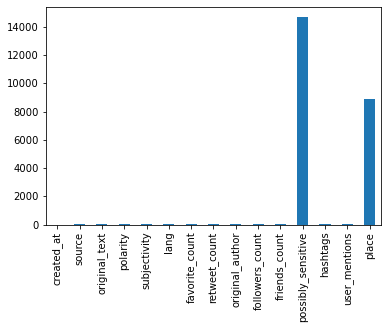

In [43]:
missing_values_count.plot(kind='bar')

### Data Cleaning

In [44]:
sys.path.append('../')

In [45]:
from clean_tweets_dataframe import Clean_Tweets

In [46]:
# Fill missing values 
processed_tweets = processed_tweets.fillna("")

In [47]:
import re

def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweet: cleaned tweet

    """
    # remove hashtags
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)
    # remove @ handles
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)

    return tweet

In [48]:
def data_cleaner(df: pd.DataFrame, save=False) -> pd.DataFrame:
    """Data Cleaner Function.
    Input:
        df: Pandas Dataframe
        save: Boolean value
    Output:
        df: Cleaned Dataframe

    """
    Tweet_cleaner = Clean_Tweets(df)
    df = Tweet_cleaner.remove_non_english_tweets(df)
    df = Tweet_cleaner.drop_duplicate(df)
    df = Tweet_cleaner.drop_unwanted_column(df)
    df = Tweet_cleaner.drop_unwanted_column(df)
    df = Tweet_cleaner.convert_to_datetime(df)
    df = Tweet_cleaner.convert_to_numbers(df)
    df['clean_text'] = df['original_text'].apply(process_tweet)
    df['clean_text'] =  df['clean_text'].astype(str)
    df['clean_text'] = df['clean_text'].apply(lambda x: x.lower())
    df['clean_text']= df['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))


    if save:
        try: 
            df.to_csv('../data/cleaned_tweet_data.csv', index=False)
            
            print('File Successfully Saved.!!!')
        
        except Exception as e:
            print("Save failed...",e)
    return df

In [49]:
cleaned_df = data_cleaner(processed_tweets, save=True)

Automation in Action...!!!
File Successfully Saved.!!!


In [50]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16367 entries, 0 to 16464
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          16367 non-null  datetime64[ns, UTC]
 1   source              16367 non-null  object             
 2   original_text       16367 non-null  object             
 3   polarity            16367 non-null  float64            
 4   subjectivity        16367 non-null  float64            
 5   lang                16367 non-null  object             
 6   favorite_count      16367 non-null  int64              
 7   retweet_count       16367 non-null  float64            
 8   original_author     16367 non-null  object             
 9   followers_count     16367 non-null  int64              
 10  friends_count       16367 non-null  int64              
 11  possibly_sensitive  16367 non-null  object             
 12  hashtags            16367 non-nu

### Extract the columns we want to use

In [51]:
selected_df = cleaned_df[['clean_text','polarity','subjectivity']]
selected_df.describe()

,polarity,subjectivity
count,16367.000000,16367.000000
mean,0.088869,0.314242
std,0.280025,0.316608
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.288889
75%,0.200000,0.529461
max,1.000000,1.000000


In [52]:
selected_df.isnull().sum()

clean_text      0
polarity        0
subjectivity    0
dtype: int64

### Most frequent words in the data

In [53]:
cleaned_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text
0,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.540000,en,43,43.0,davideiacovozzi,18,55,,"['gold', 'silver', 'crypto']","[{'screen_name': 'NorthstarCharts', 'name': 'N...",,the 10year yield is telling us that theres a ...
1,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,0.15,0.175000,en,32,32.0,davideiacovozzi,18,55,,[],"[{'screen_name': 'MichaelAArouet', 'name': 'Mi...",,german 10y mortgage rate went from 08 to 250 ...
2,2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,0.000000,en,26,26.0,davideiacovozzi,18,55,False,[],"[{'screen_name': 'goldseek', 'name': 'Peter ⚒ ...",,when
3,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,0.00,0.183333,en,213,213.0,davideiacovozzi,18,55,,[],"[{'screen_name': 'charliebilello', 'name': 'Ch...",,the 30year mortgage rate in the us rises to 5...
4,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,-0.40,0.400000,en,417,417.0,davideiacovozzi,18,55,False,[],"[{'screen_name': 'biancoresearch', 'name': 'Ji...",,rates rise until something breaks … is anythi...


In [54]:
flattened_words_df = pd.DataFrame(
    [word for words_list in cleaned_df.clean_text
    for word in words_list.split(' ')],
    columns=['word'])

flattened_words_df

,word
0,
1,the
2,10year
3,yield
4,is
...,...
269576,even
269577,an
269578,mla
269579,talks


<AxesSubplot:>

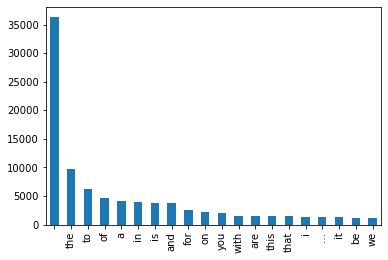

In [55]:
flattened_words_df.word.value_counts()[:20].plot(kind='bar')

### We can see from the plot above the most common words are stop words.

### Common hashtags

In [56]:
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in cleaned_df.hashtags
    for hashtag in hashtags_list.split(',')],
    columns=['hashtag'])

flattened_hashtags_df.drop(flattened_hashtags_df[flattened_hashtags_df['hashtag'] == ""].index, inplace=True)
flattened_hashtags_df.reset_index(drop=True, inplace=True)
flattened_hashtags_df

,hashtag
0,['gold'
1,'silver'
2,'crypto']
3,[]
4,[]
...,...
23270,[]
23271,[]
23272,[]
23273,[]
